# Guide to Experiment 1: RC filters

Métodos da Físcia Experimental I: (F540 2s2020)

* Texto base: Daniel Ugarte, Antônio Riul Junior, Varlei Rodrigues
* Adaptação Jupyter: Gustavo Wiederhecker

In [1]:
#-----------------------------
#Pacote para manipular vetores e matrizes
import numpy as np
#-----------------------------
#Pacotes para lidar com unidades
from astropy import units as un
from astropy import constants as cte
#-----------------------------
#pacote para gráficos
import matplotlib.pyplot as plt
import matplotlib
#Comandos opcionais para formatar gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}	
lines = {'linewidth' : 3.0}
figure = {'figsize' : [6.0, 6/1.6]}
matplotlib.rc('font', **font)
matplotlib.rc('lines', **lines)
matplotlib.rc('figure', **figure)
#-----------------------------
from myst_nb import glue
#pacote para desenhar circuitos
import SchemDraw as schem
import SchemDraw.elements as e
d = schem.Drawing(unit=2.5) # unit=2.5 determina o tamanho dos componentes
# %config InlineBackend.figure_format = 'svg'

Neste experimento serão investigados circuitos contento um capacitor e
um resistor. Estes circuitos nos permitem medir a corrente elétrica
(resistor) ou a carga elétrica (capacitor) que fluem nos circuitos. A
amplitude e a fase da corrente ou carga elétrica dependem da frequência. Esta dependência é que
motiva e denominação desses circuitos como filtros de frequência, pois eles modificam como cada frequência é transmitida pelo mesmo. dos
tipos passa-baixas ou passa-altas.

Para compreender este comportamento é fundamental revisar o conceito de
resposta em frequência, ou seja, como a resposta de um dado sistema
linear se comporta como função da frequência de excitação, portanto, é
recomendado que o aluno revise o assunto no livro de sua preferência. O
capítulo 2 do livro do Brophy (Eletrônica básica)  é uma boa
opção, ou mesmo um livro sobre equações diferenciais ordinárias.
{cite}`eggleston2011basic`

:::{admonition} Objetivos
:class: tip
-   Compreender as relações entre tensões e correntes senoidais em
    circuitos contendo resistores, capacitores e indutores.

-   Compreender como estes circuitos podem ser utilizados como filtros
    de sinais elétricos.

-   Determinar a resposta em frequência da amplitude e fase de filtros
    RC, RL e RLC; passa-baixas, passa-altas, passa-bandas,
    rejeita-bandas.

-   Descrever o comportamento de filtros através de gráficos de
    transmitância e fase em escala logarítmica (diagramas de Bode).
:::



## Frequency response of filters

Considere os diagrama dos  circuitos mostrados na figura abaixo. Todos são exemplos de divisores de tensão AC que comportam-se como filtros de frequência.

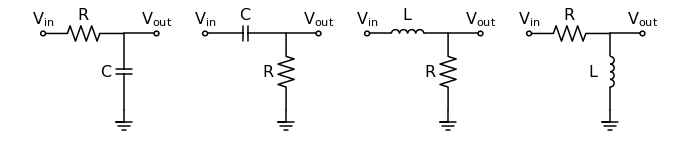

In [2]:
d = schem.Drawing(unit=2.5,)
compsL = [['R','C'],['C','R'],['L','R'],['R','L']]
comps = [[e.RES,e.CAP],[e.CAP,e.RES],[e.INDUCTOR,e.RES],[e.RES,e.INDUCTOR]]
labels = ['RC passa-baixas','RC passa-altas','RL passa-baixas','RL passa-altas']
xy0 = [0,0]
for i,comp in enumerate(compsL):
    comp1 = '$'+comp[0]+'$'
    comp2 = '$'+comp[1]+'$'
    d.add(e.DOT_OPEN, label ='$V_{in}$',xy=xy0)
    comp1 =d.add(comps[i][0], d='right',label=comp1) #capacitor
    d.add(comps[i][1], d='down',label=comp2) # resistor de saída
    d.add(e.GND)
    #output
    d.add(e.LINE, d='right', xy=comp1.end, l=1)
    d.add(e.DOT_OPEN,label ='$V_{out}$')
    xy0[0] += 5
    #---
# fig = d.draw()  
# glue("fig_filtros_diversos", display(d.draw()),display=False)
d.draw()

No laboratório, uma possível implementação de um desses circuito tem o aspecto da {ref}`foto_filtro_pa`:

```{figure} figs/foto_passa_altas.jpg
---
width: 450px
name: foto_filtro_pa
---
Filtro passa-altas montado em uma protoboard.
```

O efeito da filtragem desses circuitos pode ser notado observando o comportamento do sinal com um osciloscópio. Por exemplo, o filtro passa-altas RC se manifesta como na figura {ref}`highpass_scope`. 

```{figure} figs/sweep_freq_pa_000.png
---
width: 450px
name: highpass_scope
---
Filtro passa-altas RC (R=300,C=470 nF), frequência 10 Hz. O sinal em azul representa o sinal de entrada, enquanto o laranja representa o sinal de saída.
```

## Amplitude and phase-shifts (amplitude e deslocamento de fase)

Todo circuito elétrico cuja resposta depende da frequência introduz uma defasagem no sinal de saída em relação ao sinal de entrada. Os filtros passa-baixa e passa-alta estudados são dois exemplos típicos. A figura abaixo ilustra o sinal de entrada ($V_{in}$) e saída ($V_{out}$) de um filtro passa-alta atuando em um sinal de baixa frequência. Notem que os sinais não estão em fase. O valor da defasagem $\phi$ pode ser obtido medindo-se a diferença de tempo $\Delta t$ entre os instantes que elas cruzam 0 Volts ou entre dois máximos das funções senoidais de entrada e saída e o período $T$.

$$ 
\phi = 2\ \pi\ \cfrac{\Delta t}{T}
$$ (eq:fase)


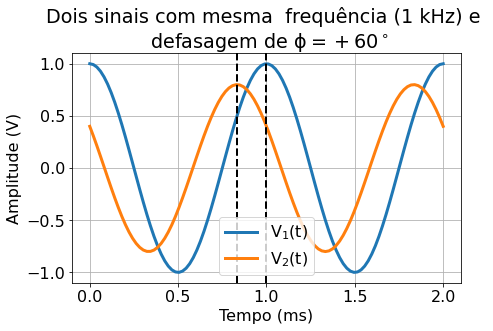

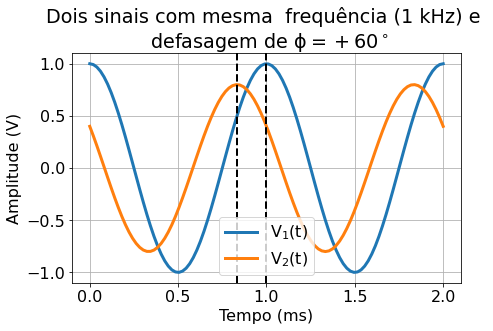

In [3]:
t = np.linspace(0,2e-3,100) # vetor de tempo
f,ϕ1,ϕ2 = 1e3,0,np.pi/3 # frequencia e fase
v01,v02 = 1,0.8 # amplitudes
#----
v1 = v01*np.cos(2*np.pi*f*t+ϕ1) # sinal v1(t)
v2 = v02*np.cos(2*np.pi*f*t+ϕ2) # sinal v2(t)

fig,ax = plt.subplots()
plt.plot(t*1e3, v1, label =r'$V_1(t)$')
plt.plot(t*1e3, v2, label =r'$V_2(t)$')
#----
ϕ = ϕ2-ϕ1 # defasagem
T = 1/f # periodo dos sinais
dt = T*ϕ/(2*np.pi) # atraso temporal entre os sinais
#linhas verticais
plt.axvline(T*1e3,color='k',linestyle='--',linewidth=2.0)
plt.axvline((T-dt)*1e3,color='k',linestyle='--',linewidth=2.0)
#--------
#formatação do gráfico
plt.grid(True) # ativa grades
plt.legend(loc='best')
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude (V)')
plt.title('Dois sinais com mesma  frequência (1 kHz) e \n defasagem de $\phi=+{:1g}^\circ$'.format(180*ϕ/np.pi));
glue("fig_fase_exemplo",fig,display=False)
#plt.savefig('sinais_defasados.pdf')

Notem que a {eq}`eq:fase` permite-nos relacionar a medida no osciloscópio (diferença de tempo) com a diferença de fase, como ilustrado na {ref}`fig:exemplo_fase`
```{glue:figure} fig_fase_exemplo
:figwidth: 400px
:name: "fig:fase_exemplo"
:align: center

Exemplo de diferença de fase entre dois sinais. A fase aqui é do sinal 2 em relação ao 1, $\phi=\phi_2-\phi_1$, portanto, o sinal 2 está **adiantado** em relação ao 1.
```

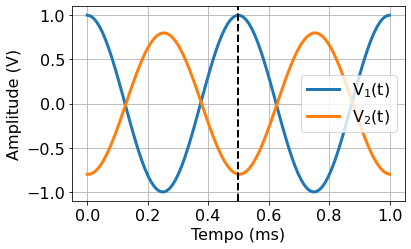

In [4]:
t = np.linspace(0,1e-3,100) # vetor de tempo
f,ϕ1,ϕ2 = 2e3,0, np.pi/2+ np.pi/3*np.random.randn()  # frequencia e fase
v01,v02 = 1,0.8 # amplitudes
#----
v1 = v01*np.cos(2*np.pi*f*t+ϕ1) # sinal v1(t)
v2 = v02*np.cos(2*np.pi*f*t+ϕ2) # sinal v2(t)
plt.plot(t*1e3, v1, label =r'$V_1(t)$')
plt.plot(t*1e3, v2, label =r'$V_2(t)$')
#----
ϕ = ϕ2-ϕ1 # defasagem
T = 1/f # periodo dos sinais
dt = T*ϕ/(2*np.pi) # atraso temporal entre os sinais
#linhas verticais
plt.axvline(T*1e3,color='k',linestyle='--',linewidth=2.0)
# plt.axvline((T-dt)*1e3,color='k',linestyle='--',linewidth=2.0)
#--------
#formatação do gráfico
plt.grid(True) # ativa grades
plt.legend(loc='best')
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude (V)')
# plt.title('Dois sinais com mesma defasagem de $\phi$'.format(180*ϕ/np.pi));
plt.tight_layout()
plt.savefig('figs/ex_delta_fase.png', bbox_inches='tight')
#plt.savefig('sinais_defasados.pdf')

````{exercise} Diferença de fase entre sinais
:label: ex:fase_delta1

Considere a figura a seguir e determine:

```{image} figs/ex_delta_fase.png
:alt: circuit picture
:width: 400px
:align: center
```
* a frequência dos sinais
* a diferença de fase entre os sinais
```` 

````{solution} ex:fase_delta1
:label: exs:fase_delta1

Para resolver esse resolver este exercício, primeiro calcule a diferente de tempo entre as ondas, depois utilize a equação {eq}`eq:fase` encontrar a diferença de fase.

````

````{exercise} Diferença de fase entres sinais no osciloscópio
:label: ex:fase_delta2

Considerando  a tela do osciloscópio que foi capturada utilizando um circuito RC:

```{image} figs/sweep_freq_PA_000.png
:alt: oscilloscope traces
:width: 400px
:align: center
```
* A amplitude $v_j\pm\delta v_j$([V]) de cada sinal;
* A frequência $f$ [1/s] (e $\omega$ [rad/s])  dos sinais ;
* A diferença de fase entre os sinais, $\phi=\phi_2-\phi_1$, considere o sinal da fase!
* Com base na fase calculada, trata-se de um filtro passa-baixas ou passa-altas? Justifique.
```` 

## Filtros RC: passa-altas (PA) e passa-baixas (PB)

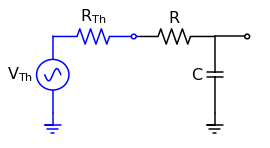

In [5]:
d = schem.Drawing(unit=2.5)
#fonte
source_color='blue' # cor da fonte
d.add(e.GND,color=source_color) # terra
d.add(e.SOURCE_SIN, label='$V_{Th}$', color=source_color) # fonte
d.add(e.RES, d='right',label='$R_{Th}$', color=source_color)
d.add(e.DOT_OPEN, color=source_color)
#circuito
diode1 =d.add(e.RES, d='right',label='$R$') #capacitor
d.add(e.CAP, d='down',label='$C$') # resistor de saída
d.add(e.GND)
#output
d.add(e.LINE, d='right', xy=diode1.end, l=1)
d.add(e.DOT_OPEN)
#---
d.draw()
d.save('figs/filtro_pb_esquema.png')

O circuito abaixo ilustra um caso de filtro onde os sinais de baixa frequência têm suas amplitudes atenuadas, enquanto sinais de alta frequência são transmitidos quase sem atenuação. Monte o filtro passa-alta usando R = 300 $\Omega$, C = 470 nF. 
```{figure} figs/filtro_pb_esquema.png
---
width: 300px
name: fig:filtro_pb_esquema
---
Esquemático de um filtro passa-baixas.
```

A função de transferência $H(\omega)$ ou ganho do circuito $G(\omega)$ são definidos como,

$$
G(\omega)=H(\omega)=\cfrac{V_{out}}{V_{in}}=\cfrac{v_{out}\exp(j\phi_{out})}{v_{in}\exp(j\phi_{in})}=\cfrac{v_{out}}{v_{in}}\exp(j\phi),
$$ (eq:ganho)
sendo que $v_{out,in}$ representam as amplitudes  e $\phi\equiv \phi_{out}-\phi_{in}$ a diferença de fase.

Experimentalmente, as amplitudes e diferença de fase são medidas separadamente, como feito no exercício {ref}`ex:fase_delta2`. Como a {ref}`eq:ganho` contém informações sobre amplitude e fase dos sinais, ela será representada através de dois gráficos (diagrama de Bode). 
Um gráfico para a amplitude transmitida pelo filtro,
$$
G_{dB} = 10\log_{10}(|G(\omega)|^2) = 20\log_{10}\left(\cfrac{V_{out}^{(pp)}}{V_{in}^{(pp)}}\right)
$$ (eq:bode_gdb_experimental)
e outra para a diferença de fase,
$$
\phi = \arg(G(\omega))=\arg\left(\cfrac{v_{out}}{v_{in}}\exp(j\phi)\right)=\phi
$$ (eq:bode_phi_experimental)

### Preparação para o experimento


````{exercise} Preparação para experimento
:label: ex:prep_exp1

* Demonstre a função de transferência (Ganho de tensão) para este circuito. Utilize as impedâncias complexas para isto.
* Qual a frequência de corte do circuito?.
* Como ele se comporta (impedância total e tensão de saída).
* Com o mínimo de matemática, tente visualizar como a fase do sinal $V_{out}$ se altera em relação à $V_{in}$.
* Qual efeito de $R_{Th}$ na resposta do circuito? Ele altera a medida de $V_{out}(f)$, $V_{in}(f)$ e $V_{out}(f)/V_{in}(f)$ ?

Simulação do circuito:
* Utilize o TinkerCAD para montar o circuito da figura {ref}`fig:filtro_pb_esquema`, investigue seu comportamento. 
* Utilize o QUCS para explorar o comportamento.

```` 

### Adquirindo os dados experimentais


Utilize o gerador de sinais para analisar o comportamento de e da fase $\phi$ para a frequência de corte, a frequência uma década abaixo da frequência de corte e a frequência uma década acima da frequência de corte. 
* Utilizando o pylab adquira os valores de $V_{in}$, frequência, $V_{out}$ e $\phi$ para uma faixa de valores de frequência. Use $V_{in}$ = 2 V ($V_{in}^{pp}=1 $ V) para a amplitude do sinal de entrada. 

```{note}
* No programa devem ser definidos os valores:
    * frequência inicial= 10 Hz
    * frequência final = 100 kHz
    * pontos = 30
* Antes de utilizar 30 pontos, faça uma varredura com 10 pontos para certificar que está tudo correto.
```

```{warning}
A aquisição de dados não será realizada no 1s2021!
```

In [6]:
import pandas as pd
data = pd.read_csv('figs/dados_sweep.csv')
glue("df_pandas_exemplo", data.head())

,Unnamed: 0,frequencia (Hz),Vpp1 (V),Vpp2 (V),fase (graus)
0,0,10.000000,1.990429,0.024232,-95.118858
1,1,13.738238,1.990429,0.030812,96.007477
2,2,18.873918,2.015002,0.037238,94.137146
3,3,25.929438,2.002716,0.050049,92.331604
4,4,35.622479,1.990429,0.065398,92.706551


### Dados disponibilizados
* Os dados disponibilizados no Teams foram obtidos seguindos os parâmetros acima.
* Dois arquivos (.zip): 
    * [Circuito passa-baixas](https://github.com/gwiederhecker/F540_jbook/blob/2021_1s/guides/exp1/dados/passa-baixas.zip?raw=true)
    * [Circuito passa-altas](https://github.com/gwiederhecker/F540_jbook/blob/2021_1s/guides/exp1/dados/passa-altas.zip?raw=true)
* Cada arquivos `.zip` contém:
    * arquivo `.jpg` com uma fotografia do circuito
    * arquivo `dados_sweep.csv`: veja exemplo da estrutura desse arquivo a seguir.
        * 4 colunas
        * a fase (coluna `fase (graus)` corresponde a $\phi = \phi_2-\phi_1$) 
    * pasta `traços-temporal-imagens`:
        * arquivos com nome `sweep_freq_xxx.bmp` correspondendo ao traço temporal utilizado para fazer calcular cada um dos parâmetros do arquivo `dados_sweep.csv`. A numeração `xxx` dos arquivos `.bmp` corresponde ao número presente na primeira coluna  do arquivo `dados_sweep.csv`
        * Certifique-se que você consegue "ler" os dados de um dos arquivos `sweep_freq_xxx.bmp` e obter o resultado correspondente registrado no arquivo `dados_sweep.csv`


````{tabbed} Exemplos tabela de dados
```{glue:figure} df_pandas_exemplo
:figwidth: 600px
:name: "tbl:pandas"
:align: center

Estrutura do arquivo de dados `.csv`, o separador entre as colunas é `,`.
```
````
````{tabbed} Exemplos screenshot osciloscópio
```{figure} figs/sweep_freq_pa_000.png
---
width: 450px
name: "fig:highpass_scope_exemplo"
---
Screenshot do osciloscópio para o passa-altas com $f=10$ Hz!
```
````

### Aplicação do filtro passa-alta

f1 = 1000.0 Hz
f2 = 500.0 Hz
f0 = (f1+f2)/2 = 750.0 Hz
δf = (f1-f2) = 500.0 Hz


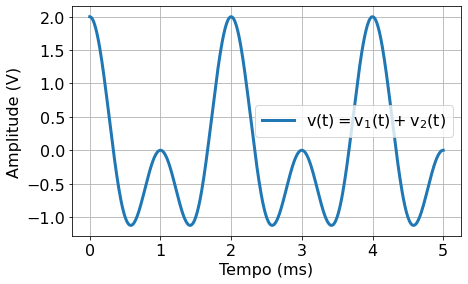

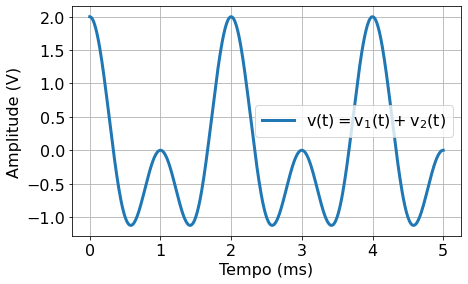

In [7]:
t = np.linspace(0,5e-3,500) # vetor de tempo
f1,f2= 1e3,0.5e3 # frequencia e fase
v01,v02 = 1,1 # amplitudes
print('f1 = {} Hz'.format(f1))
print('f2 = {} Hz'.format(f2))
print('f0 = (f1+f2)/2 = {} Hz'.format(0.5*(f1+f2)))
print('δf = (f1-f2) = {} Hz'.format(np.abs(f1-f2)))
#----
v1 = v01*np.cos(2*np.pi*f1*t) # sinal v1(t)
v2 = v02*np.cos(2*np.pi*f2*t) # sinal v2(t)
#----
fig,ax = plt.subplots()
plt.plot(t*1e3, v1+v2, label= '$v(t)=v_1(t)+v_2(t)$')
#--------
#formatação do gráfico
plt.grid(True) # ativa grades
plt.legend(loc='best')
plt.xlabel('Tempo (ms)')
plt.ylabel('Amplitude (V)')
glue("fig_dois_sinais",fig,display=False)
#plt.savefig('sinais_defasados.pdf')

Uma aplicação real muito importante de filtrs é eliminar uma componente indesejada de um sinal elétrico. Suponha um sinal que possui apenas duas frequências,

$$v(t) = v_{01} \cos(2\pi f_1 t)+v_{02} \cos(2\pi f_2 t).$$ (eq:soma_tensao)

No domínio do tempo este sinal pode ser visualizado como é mostrado na figura abaixo.

```{glue:figure} fig_dois_sinais
:figwidth: 450px
:name: "fig:dois_sinais"
:align: center

Sinal composto por duas ondas senoidais. $f_1$=1000 Hz e $f_2$=500 Hz
```

Como veremos, nosso gerador de funções BK-4052 pode gerar este tipo de sinal, porém ele representa as frequências do sinal utilizando o valor médio, $f_0=(f_1+f_2)/2,$ e a diferença de frequência,  $\delta f= f_1-f_2.$

### Efeito do filtro sobre o sinal: Decomposição de Fourier

O cálculo da função de transferência seguindo a equação {ref}`eq:ganho` exige que os sinais de entrada e saída sejam senoidais, ou seja, contenham apenas uma única frequência. Naturalmente, a equação {ref}`eq:soma_tensao` possui duas frequências, impossibilitando o uso imediato da equação {ref}`eq:ganho`. E agora José?


Bom, de acordo com o teorema de Fourier, qualquer função periódica bem comportada pode ser representada por uma somatória de funções harmônicas. Considere uma função dependente do tempo $t$ tal que $F(t) = F(t+T)$, em que $T$ e o período da função. $F(t)$ pode ser escrita como: 

$$ F(t) = \cfrac{a_0}{2} + \displaystyle\sum_{n=1}^{\infty} \left(a_n \mathrm{cos}(n \omega_0 t) + b_n \mathrm{sen}(n \omega_0 t)\right)$$ (eq:fourier)

O exemplo da eq. {ref}`eq:soma_tensao` é um caso simples da eq. {ref}`eq:fourier`, com apenas dois termos da série. Nesse caso podemos determinar os coeficientes da expansão de Fourier comparando os termos.

````{exercise} Determine os coeficientes de Fourier
:label: ex:fourier1

Seguindo a notação da eq. {ref}`eq:fourier`, determine os coeficientes de Fourier do seguinte sinal:

$$ V(t) =  (1 V)\cos(2\pi 10^3 t+\pi/4)+ (2 V) \cos(40\pi t).$$ (eq:soma_tensao_exemplo)

```` 

<!---
Note que no nosso gerador de funções, é necessário utilizar a função de modulação para gerar os dois sinais simultaneamente:
* Escolha a opção modulação;
* calcule a frequência $f_0,\delta f$ a partir das frequências dos sinais desejados;
-->

Quanto temos um sinal sobre o qual não conhecemos a função analítica que o geral, existe uma técnica numérica poderosa para se obter os coeficientes de Fourier, a transformada rápida de Fourier ou FFT (*Fast Fourier Transform*). A função a seguir foi definida para facilitar nosso cálculo da FFT.

In [8]:
from scipy.signal import blackman

def fft540(time,amp):
    """Função para calcular a FFT de um sinal. 
    Esta função é baseada no comando FFT no Numpy.  
    
    Arguments:
        time {[float]} -- vetor de tempo
        amp {[float]} -- vetor de amplitude
    
    Returns:
        [float] -- vetor de frequências
        [complex float] -- vetor de amplitudes complexas
    """    
    #### fft ####
    timestep = time[1]-time[0] # intervalo de amostragem = dt
    n = len(amp)
    fs = 1/timestep # frequencia de amostragem

    #vetor de frequencias (positivas e negativas)
    freq = np.fft.fftfreq(n, d=timestep)
    #fft
    w = blackman(n)
    yfft = 2*np.fft.fft(w*amp)/n # fft computing and normalization, fator 2 para energia em freq. positivas

    return freq[:n//2], yfft[:n//2]

A seguir exemplificamos o uso da FFT para o sinal que você resolver analíticamente no ex. {ref}`ex:fourier1`.

In [9]:
t = np.linspace(0,100e-3,int(1e5)) # vetor de tempo
f1,f2= 1e3,50 # frequencia e fase
v01,v02 = 1,2 # amplitudes
#----
v1 = v01*np.cos(2*np.pi*f1*t) # sinal v1(t)
v2 = v02*np.cos(2*np.pi*f2*t+np.pi/3) # sinal v2(t)
v = v1+v2 # soma dos dois sinais
#---- Calculando FFT
freq,Y = fft540(t,v)

In [10]:
v01,v02 = 2,2 # amplitudes
f1,f2= 500,5e3 # frequencia e fase
print((f1+f2)/2)
print((f2-f1)/2)

2750.0
2250.0


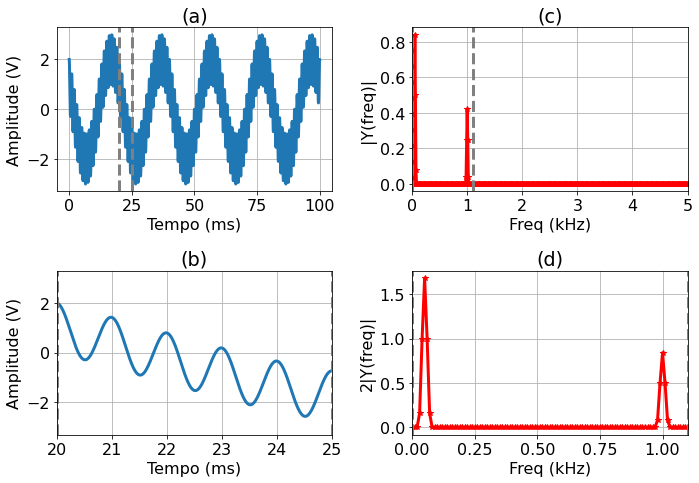

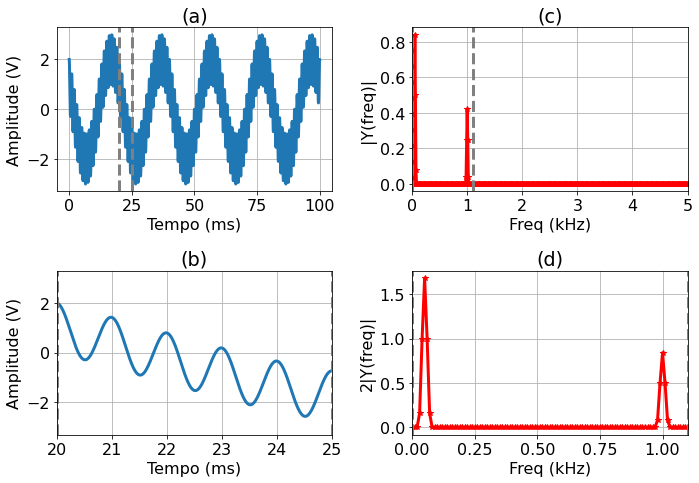

In [11]:
### gráfico com 4 eixos###
fig, ax = plt.subplots(2, 2,figsize=[10,7])
#tempo
ax0 = ax[0,0]
ax0 .plot(1e3*t,v)
ax0 .set_xlabel('Tempo (ms)')
ax0 .set_ylabel('Amplitude (V)')
ax0 .axvline(20,ls='--',c='gray')
ax0 .axvline(25,ls='--',c='gray')
ax0.grid(True)
ax0.set_title('(a)')
#tempo com zoom
ax0 = ax[1,0]
ax0.plot(1e3*t,v)
ax0.set_xlabel('Tempo (ms)')
ax0.set_ylabel('Amplitude (V)')
ax0.set_xlim([20,25])
ax0.grid(True)
ax0.axvline(20,ls='--',c='gray')
ax0.axvline(25,ls='--',c='gray')
ax0.set_title('(b)')
#fft linear - frequencias negativas e positivas
ax0 = ax[0,1]
ax0.plot(freq*1e-3, np.abs(Y),'r*-') # plotting the spectrum
ax0.set_xlabel('Freq (kHz)')
ax0.set_ylabel('|Y(freq)|')
ax0.set_xlim([0,5])
ax0.grid(True)
ax0.axvline(0,ls='--',c='gray')
ax0.axvline(1.1,ls='--',c='gray')
ax0.set_title('(c)')
#fft linear - ZOOM - apenas frequencias positivas
ax0 = ax[1,1]
ax0.plot(freq*1e-3, 2*np.abs(Y),'r*-') # plotting the spectrum
ax0.set_xlabel('Freq (kHz)')
ax0.set_ylabel('2|Y(freq)|')
ax0.set_xlim([0,1.1])
ax0.axvline(0,ls='--',c='gray')
ax0.axvline(1.1,ls='--',c='gray')
ax0.grid(True)
ax0.set_title('(d)')
#ajustar e mostrar
plt.tight_layout()
glue("fig_fft1",fig,display=False)

Nos gráficos seguintes, são mostrados o sinal temporal e também a transformada de Fourier obtida pelo FFT. 
```{glue:figure} fig_fft1
:figwidth: 800px
:name: "fig:fft1"
:align: center

(a) Traço temporal; (b) Zoom do traço temporal entre as linhas cinza pontilhadas de (a); (c) Magnitude da FFT ; (d) Magnitude da FFT, zoom   entre as linhas cinza pontilhadas de (c)
```

## **Itens para incluir no relatório**

````{important}
* Gráficos dos diagramas de Bode dos filtros passa-altas e passa-baixas. Você deverá gerar os gráficos, a partir dos dados disponibilizados
* No mesmo gráfico dos dados, incluir as curvas que representam o ajuste (*fitting*) das funções de transferência. Um exemplo desse procedimento em Python pode ser visto em  {doc}`exemplo_ajuste_rc` 
* Utilize a função FFT no Python ou em programa de sua preferência para calcule a transformada de Fourier dos sinais disponíveis nesse arquivo.
    * A diferença entre os dois sinais é que o sinal do canal 2, foi filtrado por um circuito RC. Determine se o circuito utilizado foi um passa-altas ou passa-baxas. 
````

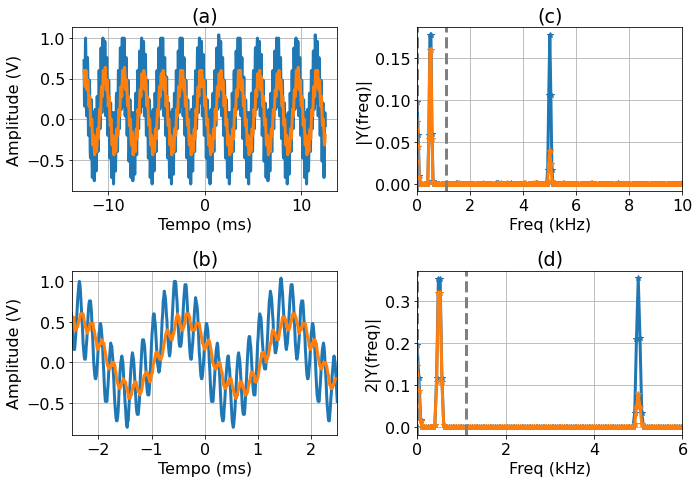

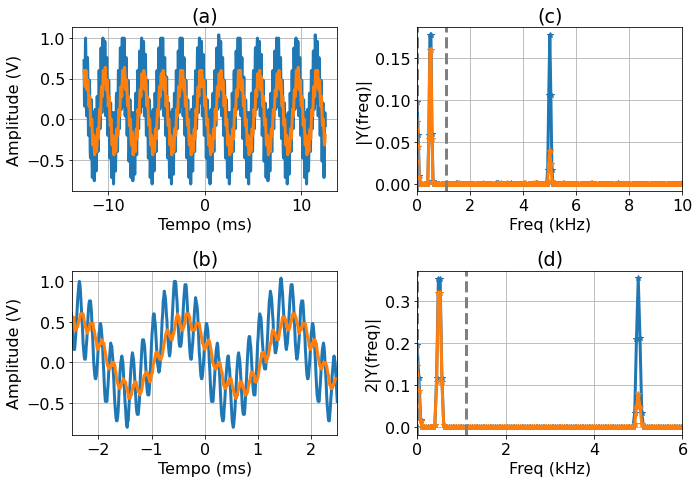

In [12]:
import pandas as pd
data = pd.read_csv('dados/fft_exemplo_experimental_pb_20_13_54.dat',sep='\t')
data.head()
t = data['time (s)']
v1 = data['Channel 1 (V)']
v2 = data['Channel 2 (V)']
freq,Y1 = fft540(t,v1)### gráfico com 4 eixos###
freq,Y2 = fft540(t,v2)### gráfico com 4 eixos###
fig, ax = plt.subplots(2, 2,figsize=[10,7])
#tempo
ax0 = ax[0,0]
ax0 .plot(1e3*t,v1)
ax0 .plot(1e3*t,v2)
ax0 .set_xlabel('Tempo (ms)')
ax0 .set_ylabel('Amplitude (V)')
# ax0 .axvline(20,ls='--',c='gray')
# ax0 .axvline(25,ls='--',c='gray')
ax0.grid(True)
ax0.set_title('(a)')
#tempo com zoom
ax0 = ax[1,0]
ax0 .plot(1e3*t,v1)
ax0 .plot(1e3*t,v2)
ax0.set_xlabel('Tempo (ms)')
ax0.set_ylabel('Amplitude (V)')
ax0.set_xlim([-2.5,2.5])
ax0.grid(True)
# ax0.axvline(20,ls='--',c='gray')
# ax0.axvline(25,ls='--',c='gray')
ax0.set_title('(b)')
#fft linear - frequencias negativas e positivas
ax0 = ax[0,1]
ax0.plot(freq*1e-3, np.abs(Y1),'*-') # plotting the spectrum
ax0.plot(freq*1e-3, np.abs(Y2),'*-') # plotting the spectrum
ax0.set_xlabel('Freq (kHz)')
ax0.set_ylabel('|Y(freq)|')
ax0.set_xlim([0,10])
ax0.grid(True)
ax0.axvline(0,ls='--',c='gray')
ax0.axvline(1.1,ls='--',c='gray')
ax0.set_title('(c)')
#fft linear - ZOOM - apenas frequencias positivas
ax0 = ax[1,1]
ax0.plot(freq*1e-3, 2*np.abs(Y1),'*-') # plotting the spectrum
ax0.plot(freq*1e-3, 2*np.abs(Y2),'*-') # plotting the spectrum
ax0.set_xlabel('Freq (kHz)')
ax0.set_ylabel('2|Y(freq)|')
ax0.set_xlim([0,6])
ax0.axvline(0,ls='--',c='gray')
ax0.axvline(1.1,ls='--',c='gray')
ax0.grid(True)
ax0.set_title('(d)')
#ajustar e mostrar
plt.tight_layout()
glue("fig_fft1",fig,display=False)

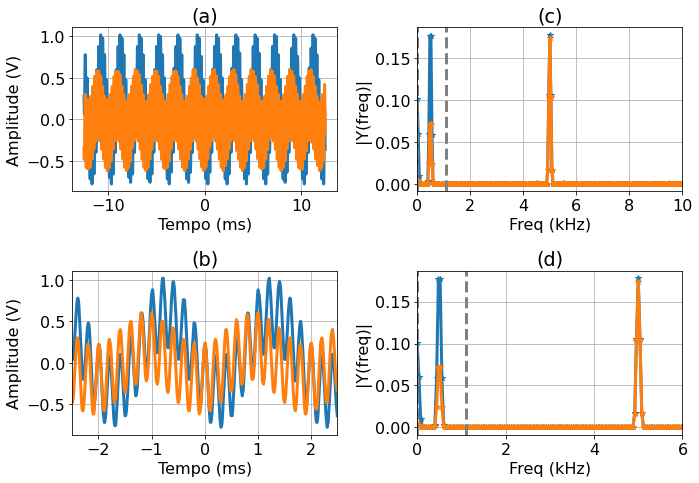

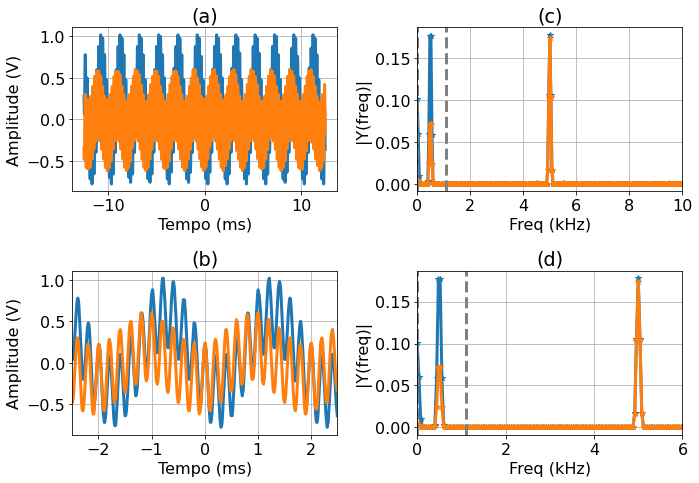

In [13]:
data = pd.read_csv('dados/fft_exemplo_experimental_pa_00_34_22.dat',sep='\t')
data.head()
t = data['time (s)']
v1 = data['Channel 1 (V)']
v2 = data['Channel 2 (V)']
freq,Y1 = fft540(t,v1)### gráfico com 4 eixos###
freq,Y2 = fft540(t,v2)### gráfico com 4 eixos###
fig, ax = plt.subplots(2, 2,figsize=[10,7])
#tempo
ax0 = ax[0,0]
ax0 .plot(1e3*t,v1)
ax0 .plot(1e3*t,v2)
ax0 .set_xlabel('Tempo (ms)')
ax0 .set_ylabel('Amplitude (V)')
# ax0 .axvline(20,ls='--',c='gray')
# ax0 .axvline(25,ls='--',c='gray')
ax0.grid(True)
ax0.set_title('(a)')
#tempo com zoom
ax0 = ax[1,0]
ax0 .plot(1e3*t,v1)
ax0 .plot(1e3*t,v2)
ax0.set_xlabel('Tempo (ms)')
ax0.set_ylabel('Amplitude (V)')
ax0.set_xlim([-2.5,2.5])
ax0.grid(True)
# ax0.axvline(20,ls='--',c='gray')
# ax0.axvline(25,ls='--',c='gray')
ax0.set_title('(b)')
#fft linear - frequencias negativas e positivas
ax0 = ax[0,1]
ax0.plot(freq*1e-3, np.abs(Y1),'*-') # plotting the spectrum
ax0.plot(freq*1e-3, np.abs(Y2),'*-') # plotting the spectrum
ax0.set_xlabel('Freq (kHz)')
ax0.set_ylabel('|Y(freq)|')
ax0.set_xlim([0,10])
ax0.grid(True)
ax0.axvline(0,ls='--',c='gray')
ax0.axvline(1.1,ls='--',c='gray')
ax0.set_title('(c)')
#fft linear - ZOOM - apenas frequencias positivas
ax0 = ax[1,1]
ax0.plot(freq*1e-3, np.abs(Y1),'*-') # plotting the spectrum
ax0.plot(freq*1e-3, np.abs(Y2),'*-') # plotting the spectrum
ax0.set_xlabel('Freq (kHz)')
ax0.set_ylabel('|Y(freq)|')
ax0.set_xlim([0,6])
ax0.axvline(0,ls='--',c='gray')
ax0.axvline(1.1,ls='--',c='gray')
ax0.grid(True)
ax0.set_title('(d)')
#ajustar e mostrar
plt.tight_layout()
glue("fig_fft2",fig,display=False)

### Propriedades do gerador de RF
* Calcule a impedância que o gerador percebe ao se conectar o circuito passa-baixas no mesmo. Mostre em um gráfico como esta impedância varia como função da frequência (utilize ```plt.semilogx```) 
* Com base na tensão medida no canal de entrada ($V_1$) e o circuito Thevenin da nosso gerador, determine a impedância Thevenin do gerador $R_{Th}$

## Referências

```{bibliography}
:style: unsrt
```